# How Leg Motion Effect COM

Case 1:
Shaft Length: Fixed to 0cm, only moved the two pairs of leg in phase, aim to see how leg movement affect the com

In [1]:
from IPython.display import Video

Video("simulation_videos/trajectory_log_com1.mp4", width=600)


Case 2:
Shaft Length: Fixed to 9 cm, only moved the two pairs of leg in phase, aim to see how leg movement affect the com

In [ ]:
from IPython.display import Video

Video("simulation_videos/trajectory_log_com2.mp4", width=600)

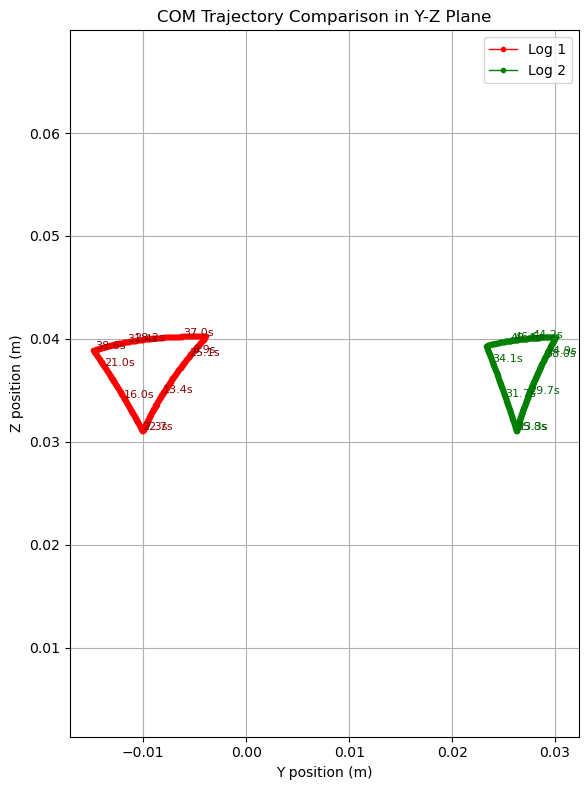

In [ ]:
import csv
import matplotlib.pyplot as plt

csv_file1 = "data/simulation_data/trajectory_log_com1.csv"
csv_file2 = "data/simulation_data/trajectory_log_com2.csv"

def read_csv(csv_file):
    y_vals = []
    z_vals = []
    time_vals = []

    with open(csv_file, "r") as f:
        reader = csv.reader(f)
        next(reader)  # skip header

        for row in reader:
            time, x, y, z = row
            time_vals.append(float(time))
            y_vals.append(float(y))
            z_vals.append(float(z))
    return y_vals, z_vals, time_vals

y1, z1, t1 = read_csv(csv_file1)
y2, z2, t2 = read_csv(csv_file2)

plt.figure(figsize=(6, 8))
plt.plot(y1, z1, marker='.', linestyle='-', linewidth=1, label='Log 1', color='red')
plt.plot(y2, z2, marker='.', linestyle='-', linewidth=1, label='Log 2', color='green')

N = 50
for i in range(0, len(t1), N):
    plt.annotate(f"{t1[i]:.1f}s", (y1[i], z1[i]), fontsize=8, color='darkred')
for i in range(0, len(t2), N):
    plt.annotate(f"{t2[i]:.1f}s", (y2[i], z2[i]), fontsize=8, color='darkgreen')

plt.title("COM Trajectory Comparison in Y-Z Plane")
plt.xlabel("Y position (m)")
plt.ylabel("Z position (m)")
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()


Case3: Here I did an extension and record the change of spine length with step size 1cm

In [ ]:
from IPython.display import Video

Video("simulation_videos/trajectory_log_com3.mp4", width=600)


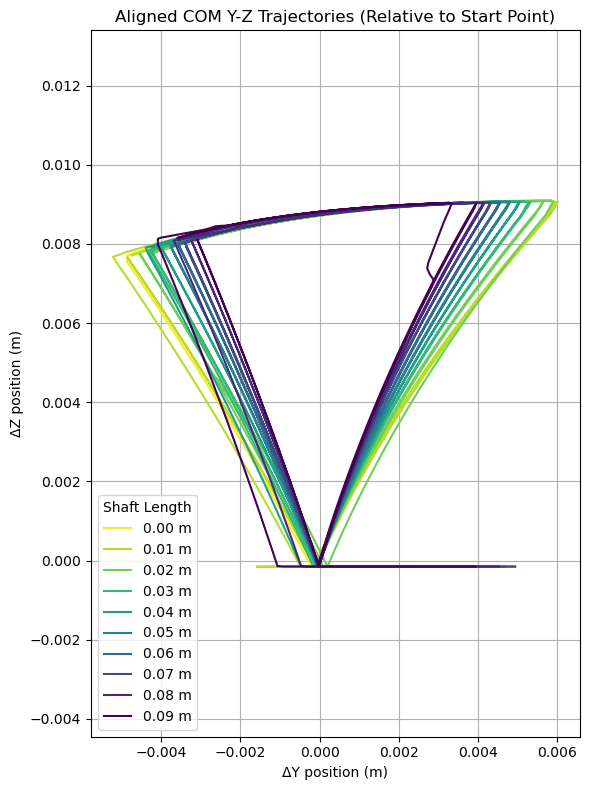

In [3]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

csv_file = "data/simulation_data/trajectory_log_com3.csv"

segments = defaultdict(lambda: {'y': [], 'z': []})

with open(csv_file, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    
    for row in reader:
        time, x, y, z, shaft_length = row
        shaft_length = float(shaft_length)
        segments[shaft_length]['y'].append(float(y))
        segments[shaft_length]['z'].append(float(z))

plt.figure(figsize=(6, 8))
colors = plt.cm.viridis_r(
    [i / (len(segments) - 1) for i in range(len(segments))]
)

for idx, (shaft_length, data) in enumerate(sorted(segments.items())):
    y_vals = data['y']
    z_vals = data['z']
    
    y_shifted = [y - y_vals[0] for y in y_vals]
    z_shifted = [z - z_vals[0] for z in z_vals]
    
    plt.plot(y_shifted, z_shifted, label=f"{shaft_length:.2f} m", color=colors[idx])

plt.title("Aligned COM Y-Z Trajectories (Relative to Start Point)")
plt.xlabel("ΔY position (m)")
plt.ylabel("ΔZ position (m)")
plt.grid(True)
plt.axis("equal")
plt.legend(title="Shaft Length")
plt.tight_layout()
plt.show()
